In [90]:
#-*- coding:utf-8 -*-
import numpy as np
import operator

In [66]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0,0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [68]:
group, labels = createDataSet()

In [74]:
def classify0(inX, dataSet, labels, k):
    #compute the distance between inX and each dataSet
    dataSetSize = dataSet.shape[0]
    diffMat= np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistances = distances.argsort()
    #choose k points which are near the inX
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistances[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 1) + 1
    #sort
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    #print(sortedClassCount)
    return sortedClassCount[0][0]

In [70]:
classify0([0, 0], group, labels, 3)

[('B', 3), ('A', 2)]


'B'

In [8]:
fr = open('../../sample/Ch02/datingTestSet.txt')
arrayOfLines  = fr.readlines()
numberOfLines = len(arrayOfLines)
returnMat = np.zeros((numberOfLines, 3))
classLabelVector = []
index = 0

In [9]:
for line in range(10):
    print(arrayOfLines[line])

40920	8.326976	0.953952	largeDoses

14488	7.153469	1.673904	smallDoses

26052	1.441871	0.805124	didntLike

75136	13.147394	0.428964	didntLike

38344	1.669788	0.134296	didntLike

72993	10.141740	1.032955	didntLike

35948	6.830792	1.213192	largeDoses

42666	13.276369	0.543880	largeDoses

67497	8.631577	0.749278	didntLike

35483	12.273169	1.508053	largeDoses



In [13]:
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines  = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector
datingDataMat, datingLabels = file2matrix('../../sample/Ch02/datingTestSet2.txt')

In [18]:
datingDataMat.shape

(1000, 3)

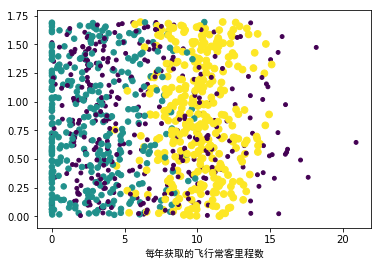

In [36]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.xlabel('每年获取的飞行常客里程数',fontproperties='SimHei')
plt.show()

In [59]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals
    

In [60]:
normDataSet, ranges, minVals = autoNorm(datingDataMat)

In [83]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLables = file2matrix('../../sample/Ch02/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m],3)
        print("The classifier came back with: %d, the real answer is: %d" % (classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("The total error rate is %f" % (errorCount/float(numTestVecs)))

In [94]:
def classifyPerson():
    resultList = ['Not at all', 'in small doses', 'in large doses']
    percetTals = float(input("percetage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year"))
    datingDataMat, datingLables = file2matrix('../../sample/Ch02/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    inArr = np.array([percetTals, ffMiles, iceCream])
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels,3)
    print("You will probably like this person: ", resultList[classifierResult - 1])
classifyPerson()

percetage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year0.5
You will probably like this person:  Not at all


In [98]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] =int(lineStr[j])
    return returnVect
testVect = img2vector('../../sample/Ch02/trainingDigits/0_13.txt')

In [105]:
import os, sys

#def handwritingClassTest():
hwLabels = []
trainingFileList = os.listdir('../../sample/Ch02/trainingDigits')
#print(trainingFileList)
m = len(trainingFileList)
trainingMat = np.zeros((m, 1024))
for i in range(m):
    fileNameStr = trainingFileList[i]
    fileStr = fileNameStr.split('.')[0]
    classNumStr = int(fileStr.split('_')[0])
    hwLabels.append(classNumStr)
    trainingMat[i, :] = img2vector('../../sample/Ch02/trainingDigits/%s' %fileNameStr)
testFileList = os.listdir('../../sample/Ch02/testDigits')
errorCount = 0.0
mTest = len(testFileList)
for i in range(mTest):
    fileNameStr = testFileList[i]
    fileStr = fileNameStr.split('.')[0]
    classNumStr = int(fileStr.split('_')[0])
    vectorUnderTest = img2vector('../../sample/Ch02/testDigits/%s' %fileNameStr)
    classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
    print("The classifier came back with: %d, hte real answer is:%d" %(classifierResult, classNumStr))
    if(classifierResult != classNumStr):
        errorCount += 1.0
        print("worrrrrrrrrrrrrrrrrrrrrry!")
print("\nThe total number of errors is :%d"%errorCount)
print("\nThe total error rate is:%f"%(errorCount/float(mTest)))

    

The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classifier came back with: 0, hte real answer is:0
The classi